Task 1 : Prediction using Supervised Machine Learning
In this task we have to predict the percentage of score of a student based of the number of hours studied. The task has two variable where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 1 - Read the data from Online source

In [2]:
data = "http://bit.ly/w-data"
dataset = pd.read_csv(data)

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


Step 2 - Input data Visualization

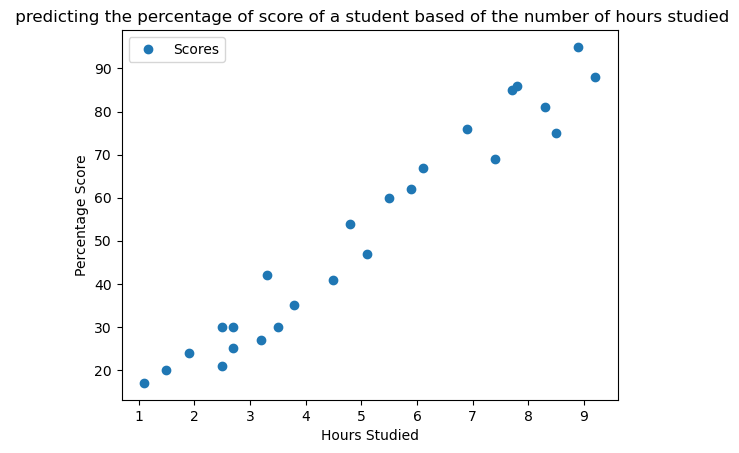

In [9]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title(' predicting the percentage of score of a student based of the number of hours studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Observation : From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Step 3 - Data Preprocessing

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Step 4 - Model Training
Splitting the data into training and testing sets, and training the algorithm.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


Step 5 - Plotting the Line of regression
Now since our model is trained now, its the time to visualize the best-fit line of regression

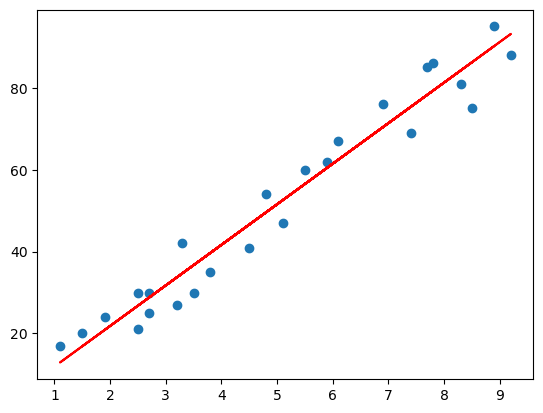

In [15]:
#Plotting the regression line
#line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.show()

Step 6 - Making Predictions

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
print("Training Score:", regressor.score(X_train, y_train))
print("Test Score:", regressor.score(X_test, y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


In [21]:
#Testing the data with are own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


Step 7 - Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
